# Mutual Information Theory

### Initializer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sci
import scipy as sci
from scipy.io import loadmat
import pandas as pd
import math

from scipy import optimize

## Computational problem set 3

### Question 1

In [2]:
numbins = 40; #number of bins used throughout

The mean of this distribution is 0.0007609635352796212
The standard deviation is 0.9979977456349904


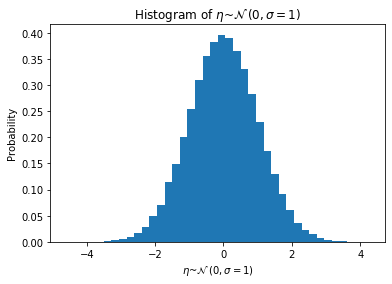

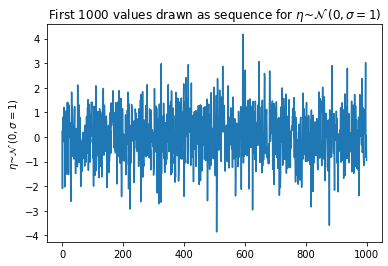

In [3]:
mu = 0
sigma = 1

s = np.random.normal(mu,sigma,100000)

print("The mean of this distribution is", np.mean(s))
print("The standard deviation is", np.std(s))

a, bins, c = plt.hist(s,numbins,density = True);
plt.title("Histogram of " + r"$\eta \textasciitilde \mathcal{N}\:(0,\sigma = 1)$")
plt.xlabel(r"$\eta \textasciitilde \mathcal{N}\:(0,\sigma = 1)$")
plt.ylabel("Probability")

plt.figure()
plt.plot(s[:1000]);
plt.title("First 1000 values drawn as sequence for " + r"$\eta \textasciitilde \mathcal{N}\:(0,\sigma = 1)$");
plt.ylabel(r"$\eta \textasciitilde \mathcal{N}\:(0,\sigma = 1)$");

In [4]:
"""
dx and dy for Reimann sums later
"""

dx, dy = bins[1]-bins[0], bins[1]-bins[0]

### Question 2: System with Memory and Noise

The mean of this distribution is 0.025194898132899324
The standard deviation is 1.0002671393135592


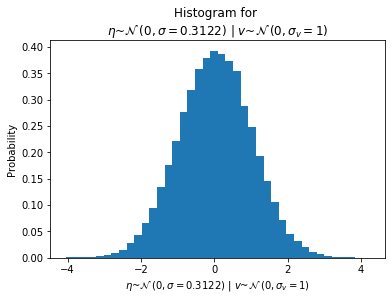

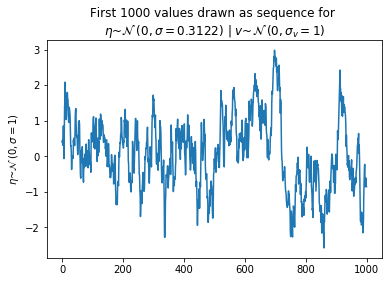

In [5]:
"""
Constants
"""
mu = 0 
sigma = 0.3122 #stdev, variance would be sigma^2
sigmav = 1
gamma = 0.95

vs = [] #empty list to store samples for system with memory

vk = np.random.normal(mu,sigmav,1)[0] #initializing v_0

for n in range(100000):
    vs.append(vk) #add to list
    
    eta = np.random.normal(mu,sigma,1)[0] #drawing random sample for eta
    vk = gamma*vk + eta #update

print("The mean of this distribution is", np.mean(vs))
print("The standard deviation is", np.std(vs))    

plt.hist(vs,numbins,density = True);
plt.title("Histogram for \n" + r"$\eta \textasciitilde \mathcal{N}\:(0,\sigma = 0.3122)$" 
         + r" | $v \textasciitilde \mathcal{N}\:(0,\sigma _v = 1)$")
plt.xlabel(r"$\eta \textasciitilde \mathcal{N}\:(0,\sigma = 0.3122)$" + r" | $v \textasciitilde \mathcal{N} \: (0,\sigma _v = 1)$")
plt.ylabel("Probability")

plt.figure()
plt.plot(vs[:1000]);
plt.title("First 1000 values drawn as sequence for \n" + r"$\eta \textasciitilde \mathcal{N}\:(0,\sigma = 0.3122)$" 
         + r" | $v \textasciitilde \mathcal{N}\:(0,\sigma _v = 1)$");
plt.ylabel(r"$\eta \textasciitilde \mathcal{N}\:(0,\sigma = 1)$");

### Question 3

In [6]:
"""
Constants
"""
mu = 0
sigma = 0.3122
sigmav = 1
gamma = 0.95

vs = [] #empty list to store samples for system with memory
vk = np.random.normal(mu,sigmav,1)[0] #initializing v_0

"""
Distributions
"""

s = np.random.normal(mu,sigma,100000) #normal distribution

n, bins = np.histogram(s,numbins,density = True)

for i in range(100000): #memory distribution
    vs.append(vk) #add to list
    
    eta = np.random.normal(mu,sigma,1)[0] #drawing random sample for eta
    vk = gamma*vk + eta #update
    
nv, binsv = np.histogram(vs,numbins,density = True)

In [7]:
entropy, entropyv = 0, 0;

for p, pv in zip(n,nv): #if there are no hits in bin (i.e. counts = 0) then add 0 to entropy
    entropy += 0 if p == 0 else p*math.log2(p)*dx
    entropyv += 0 if pv == 0 else pv*math.log2(pv)*dx

print("The entropy of the normal distribution is",entropy," bits")
print("The entropy of the system with memory is", entropyv, " bits")

The entropy of the normal distribution is -1.1547227527902497  bits
The entropy of the system with memory is -2.0227979654595063  bits


### Question 4

In [8]:
"""
Constants
"""
mu = 0
sigma = 0.3122
sigmav = 1
gamma = 0.95

entropys, entropyvs = [], []; #empty lists to store entropy

for j in range(50): #50 different samples drawn
    entropy, entropyv = 0, 0; #initializing entropy
    vs = [] #empty list to store samples for system with memory
    vk = np.random.normal(mu,sigmav,1)[0] #initializing v_0

    """
    Distributions
    """
    s = np.random.normal(mu,sigma,100000) #normal distribution

    n, bins = np.histogram(s,numbins,density = True)

    for i in range(100000): #memory distribution
        vs.append(vk) #add to list

        eta = np.random.normal(mu,sigma,1)[0] #drawing random sample for eta
        vk = gamma*vk + eta #update

    nv, binsv = np.histogram(vs,numbins,density = True)

    """
    Calculate Entropy
    """
    for p, pv in zip(n,nv): #if there are no hits in bin (i.e. counts = 0) then add 0 to entropy
        entropy += 0 if p == 0 else p*math.log2(p)*dx
        entropyv += 0 if pv == 0 else pv*math.log2(pv)*dx

    entropys.append(-entropy)
    entropyvs.append(-entropyv)
    
#create dataframe for data visualization purposes
df = pd.DataFrame({"Mean": [np.mean(entropys), np.mean(entropyvs)],  
                   "STDev \u03C3": [np.std(entropys), np.std(entropyvs)],
                   "Variance" : [np.var(entropys), np.var(entropyvs)]}, 
                   index = ["\u03B7","v"])
df

,Mean,STDev σ,Variance
η,1.207991,0.049809,0.002481
v,2.162684,0.106416,0.011324


It seems like the entropies of the two distributions are significantly different. The means of the distributions are more than 2 stdevs away from each other.

### Question 5: Joint Probability

The mean of this distribution is -0.0010130283616273663
The standard deviation is 0.9969918266781341


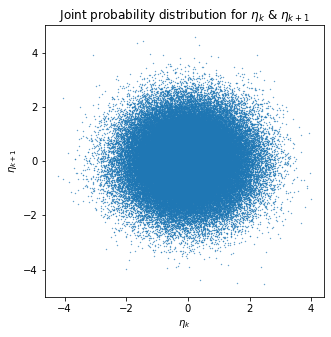

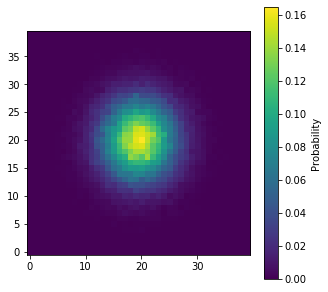

In [9]:
mu = 0
sigma = 1

s = np.random.normal(mu,sigma,100000)
s1 = np.random.normal(mu,sigma,100000)

countsEta, c = np.histogram(s,numbins,density = True)
countsEta1, c = np.histogram(s1,numbins,density = True)

print("The mean of this distribution is", np.mean(s))
print("The standard deviation is", np.std(s))

plt.figure(figsize=(5,5))
plt.title("Joint probability distribution for " + r"$\eta _k$ & $\eta _{k+1}$");
plt.xlabel(r"$\eta _k$");
plt.ylabel(r"$\eta _{k+1}$");
plt.scatter(s,s1,s=0.1);

counts2d, bins = np.histogramdd([s,s1],numbins,density = True) #2d histogram binning

plt.figure(figsize=(5,5))
plt.imshow(counts2d,origin='lower');
plt.colorbar(label="Probability");

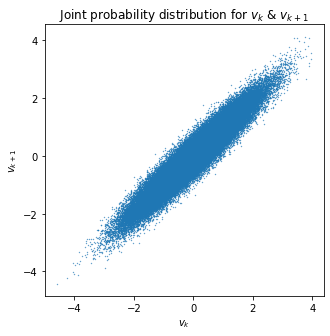

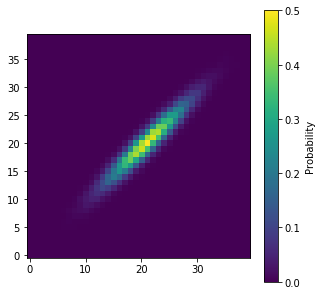

In [10]:
"""
Constants for v_k 
"""
mu = 0 
sigma = 0.3122 #stdev, variance would be sigma^2
sigmav = 1
gamma = 0.95

vks = np.array(np.random.normal(mu,sigmav,100000)) #generate vks with sigma_v
etas = np.array(np.random.normal(mu,sigma,100000)) #generate etas with sigma

vks1 = gamma*vks + etas #generate v_{k+1}s from generated v_ks

countsvk, c = np.histogram(vks,numbins,density = True) #binning v_k
countsvk1, c = np.histogram(vks1,numbins,density = True) #binning v_{k+1}
countsv2d, binsv, c = np.histogram2d(vks1,vks,bins = numbins,density = True) #2d histogram binning

plt.figure(figsize=(5,5))
plt.scatter(vks,vks1,s=0.1)
plt.title("Joint probability distribution for " + r"$v _k$ & $v _{k+1}$");
plt.xlabel(r"$v_k$");
plt.ylabel(r"$v_{k+1}$");

plt.figure(figsize=(5,5))
plt.imshow(countsv2d,origin='lower');
plt.colorbar(label="Probability");

### Question 6: Mutual Information

Mutual information between memory dependent draws with noise; i.e. $I[v_k,v_{k+1}]$

In [11]:
mutualInformation = 0;

for i in range(len(countsvk)): #loop through vks
    for j in range(len(countsvk1)): #loop through vks1
        if countsv2d[i][j] == 0 or countsvk[i] == 0 or countsvk1[j] == 0: #if probability = 0, then add 0
            mutualInformation += 0;
        else:
            mutualInformation += dx*dy*countsv2d[i][j]*math.log2(countsv2d[i][j]/(countsvk[i]*countsvk1[j])) 
            
mutualInformation = mutualInformation*-1

print("The mutual information for memory dependent draws with noise is I =", mutualInformation)

The mutual information for memory dependent draws with noise is I = -1.820366846016382


Mutual information between two normal distributions; i.e. $I[n_k,n_{k+1}]$

In [12]:
mu = 0
sigma = 1

s = np.random.normal(mu,sigma,100000)
s1 = np.random.normal(mu,sigma,100000)

countsEta, c = np.histogram(s,bins = numbins,density = True) #binning normal dist
countsEta1, c = np.histogram(s1,bins = numbins,density = True) #binning another normal dist
counts2d, c, d = np.histogram2d(s,s1,bins = numbins,density = True) #2d histogram binning

mutualInformation = 0;
counts = 0;

for i in range(len(countsEta)): #loop through vks
    for j in range(len(countsEta1)): #loop through vks1
        if counts2d[i][j] == 0 or countsEta[i] == 0 or countsEta1[j] == 0:
            mutualInformation += 0;
        else:
            mutualInformation += dx*dy*counts2d[i][j]*math.log2(counts2d[i][j]/(countsEta[i]*countsEta1[j]))
            
mutualInformation = mutualInformation*-1

print("The mutual information for normal distributions is I =", mutualInformation)

The mutual information for normal distributions is I = -0.00978201125142351


### Question 7: Why

There's a difference in the mutual information for $I[n_k,n_{k+1}]$ and $I[v_k,v_{k+1}]$ because the draws for the normal distribution in $n_k$ and $n_{k+1}$ are completely independent of one another (previous draws have no effect on future draws). Thus, the mutual information between these two distributions would be 0. However, the draws for the system with memory have dependence on the previous draws, and thus, the mutual information between the two would be nonzero. <br> <br> This is a really nice thing about mutual information; if variables are completely independent of one another, then the mutual information between the two will be near 0! Dependent variables on the other hand, will have nonzero mutual information.